In [29]:
# Importing the required packages for twitter data collection !
import tweepy
from tweepy import OAuthHandler
import json
import re
from nltk.tokenize import word_tokenize
import operator
from collections import Counter
from nltk import bigrams
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

tokens_re = re.compile(r'(' + '|'.join(regex_str) + ')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)


def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


In [4]:
# This is for getting rid of from stop words in tweets. 
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT', 'via', '…']


In [5]:
# Most used hashtags in tweets! Top 10 will be shown but we can increase it by changing the count_all.most_common
fname = 'tweet.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text'].lower()) if term not in stop]
        
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_stop)
        
        # Count hashtags only
        terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
        
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        
        # Update the counter
        count_all.update(terms_hash)
    # Print the first 5 most frequent words
    print(count_all.most_common(10))

[('#God', 1221), ('#Jesus', 1122), ('#RoyMoore', 705), ('#Bible', 465), ('#VITÓRIA', 442), ('#FikeFirme', 428), ('#JESUSéContigo', 341), ('#SejaLUZ', 235), ('#jesus', 217), ('#truth', 169), ('#Christian', 142), ('#Christ', 133), ('#bible', 126), ('#GOD', 124), ('#Christianity', 108), ('#SejaBENÇÃO', 106), ('#President', 100), ('#EchoChamber', 100), ('#LaLaLand', 100), ('#FamilyValues', 100), ('#love', 95), ('#god', 91), ('#JesusChrist', 83), ('#', 81), ("#God's", 74), ('#OneNationUnderGOD', 66), ('#Christmas', 65), ('#JESUS', 63), ('#ISIS', 58), ('#faith', 54), ('#TRUDEAU', 41), ('#Taliban', 40), ('#AlQaeda', 40), ('#Islam', 39), ('#BokoHaram', 38), ('#AlShabab', 38), ('#AlNusrah', 38), ('#HTS', 38), ('#Terrorism', 38), ('#Truth', 38), ('#HolyBible', 35), ('#pray', 33), ('#Faith', 33), ('#Love', 32), ('#Progressive', 32), ('#Nation', 32), ('#Time', 31), ('#Lord', 29), ('#Democrat', 29), ('#MerryChristmas', 28), ('#praise', 28), ('#SecretIllegalCrownCourt', 28), ('#Christians', 27), ('#

In [6]:
# Most used words in tweets 

with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_stop)
        
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        
        # Update the counter
        count_all.update(terms_only)
    # Print the first 5 most frequent words
    print(count_all.most_common(10))

[('te', 886), ('NADA', 884), ('pode', 884), ('I', 647), ('A', 588), ('2018', 544), ('get', 504), ('Lord', 493), ('You', 491), ('é', 453), ('God', 442), ('à', 442), ('deter', 442), ('resistir', 442), ('SUA', 442), ('Rumo', 441), ('let', 406), ('No', 382), ('Please', 376), ('hard', 357), ('Like', 354), ('Senator', 350), ('playin', 349), ('gals', 348), ('BJUz', 340), ('ツ', 340), ('amp', 336), ('The', 324), ('💥', 266), ('’', 255), ('one', 253), ('Psalms', 247), ('Jesus', 230), ('us', 199), ('️', 194), ('2', 175), ('My', 168), ('life', 157), ('every', 149), ('world', 143), ('1', 142), ('He', 137), ('Him', 130), ('see', 128), ('🙏', 127), ('even', 124), ('LORD', 124), ('could', 122), ('Thank', 118), ('THIS', 115), ("God's", 114), ('Just', 110), ('pray', 110), ('Not', 109), ('love', 108), ('“', 107), ('question', 104), ('Again', 102), ('de', 102), ('everything', 101), ('folks', 101), ('da', 100), ('engagement', 100), ('John', 100), ('👇', 99), ('5', 99), ('thinking', 98), ('If', 98), ('WOW', 97

In [7]:
'''from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
with open(fname, 'r') as f:
    for line in f: 
        tweet = json.loads(line)
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop 
                      and not term.startswith(('#', '@'))]
 
    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1'''

In [17]:
# Opening the file and loading the lines 
tweet_files = ['tweet.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

In [18]:
# Creating an dataframe from tweets and extracting relevant information from tweets variable! 
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    return df


In [44]:
df = populate_tweet_df(tweets)
df.

,text,location,country_code,long,latt
0,"RT @h56jh19: left without a ""norm"" to which he...",New Jerusalem,,NaN,NaN
1,#NEW #ConflictResolution #Acts15 #Religious #D...,None,,NaN,NaN
2,RT @NiravaSara: #Jesus \nis being used \nas a ...,None,,NaN,NaN
3,"@washingtonpost Quran, I've been greatly impre...",None,,NaN,NaN
4,RT @h56jh19: #WednesdayMotivation Not many pro...,New Jerusalem,,NaN,NaN


/Users/borgausifo/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/borgausifo/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


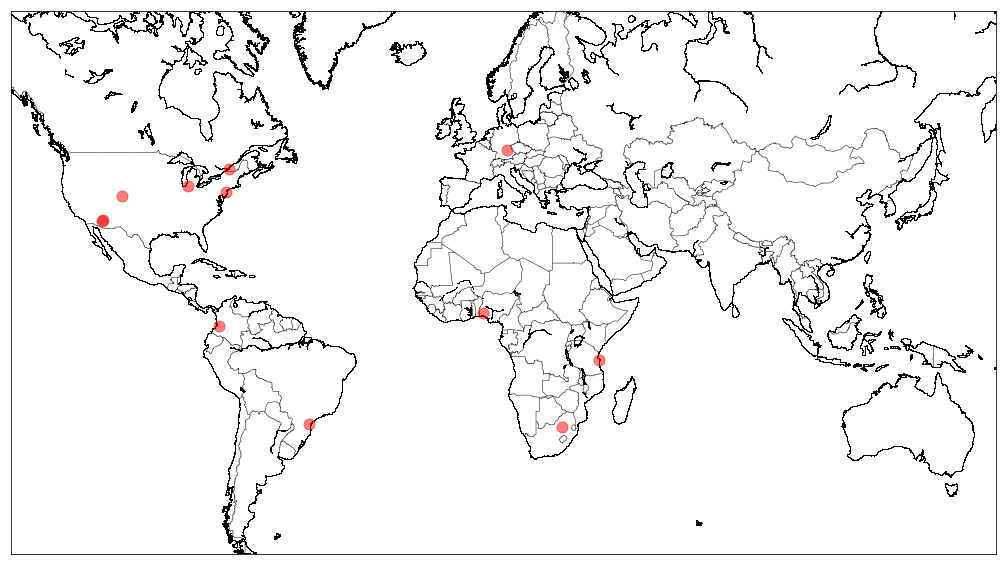

In [42]:
# Plotting the tweets based on locations ! 

from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
plt.figure(figsize=(19,10))
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'h', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=11, alpha=0.5)
 
plt.show()